# Explorer un corpus

## Imports

In [4]:
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import numpy as np

## Compter le nombre de documents dans le corpus

In [6]:
path = "../data/camille_crise_economique_depression_economique_année 30/"
files = sorted(os.listdir(path))
len(files)

3700

## Explorer les noms de fichier

Nous allons manipuler ici les chaines de caractères.

Il s'agit de la classe `str` en Python.

Pour en savoir plus : https://openclassrooms.com/fr/courses/235344-apprenez-a-programmer-en-python/231888-creez-votre-premier-objet-les-chaines-de-caracteres

In [7]:
chaine = 'KB_JB427_1929-03-01_01-00001'
type(chaine)

str

In [8]:
# la méthode split
chaine_split = chaine.split('_')
chaine_split

['KB', 'JB427', '1929-03-01', '01-00001']

In [9]:
# Accéder à la date
date = chaine_split[2]

# Accéder à l'année
date_split = date.split('-')
year = date_split[0]

In [10]:
# Manipuler les str pour convertir une année en décennie
year[:3]

'192'

In [11]:
year[-1]

'9'

In [12]:
year[:3] + '0s'

'1920s'

## Quelques statistiques

In [13]:
all_years = [str(year) for year in range(1887, 1970)]

In [15]:
count_decade = defaultdict(int)
count_year = defaultdict(int)
count_month = defaultdict(int)
count_newspapers = defaultdict(int)
covered_years = set()

for f in files:
    if "_" in f and f.endswith("txt"):
        elems = f.split("_")
        
        newspaper = elems[1]
        
        year = elems[2].split("-")[0]
        covered_years.add(year)
        decade = year[:3] + "0s"
        
        month = int(elems[2].split("-")[1])
        
        count_decade[decade] += 1
        count_newspapers[newspaper] += 1
        count_month[month] += 1
        count_year[year]+=1
    else:
        print(f"Anomalous file: {f}")

In [16]:
print(f"Il y a {count_newspapers['JB838']} exemplaires du journal Le Soir et {count_newspapers['JB427']} exemplaires de La Libre Belgique")

Il y a 2038 exemplaires du journal Le Soir et 1662 exemplaires de La Libre Belgique


In [20]:
print(f"Il y a {count_decade['1930s']} fichiers pour la décennie 1930s")

Il y a 3666 fichiers pour la décennie 1930s


In [21]:
missing_years = [y for y in all_years if y not in covered_years]
print(f"Années manquantes: {', '.join(missing_years)}")

Années manquantes: 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969


## Visualisation du nombre de journaux par mois

Ces visualisations sont obtenues avec la librairie Matplotlib.

Pour en savoir plus : https://openclassrooms.com/fr/courses/4452741-decouvrez-les-librairies-python-pour-la-data-science/4740942-maitrisez-les-possibilites-offertes-par-matplotlib.

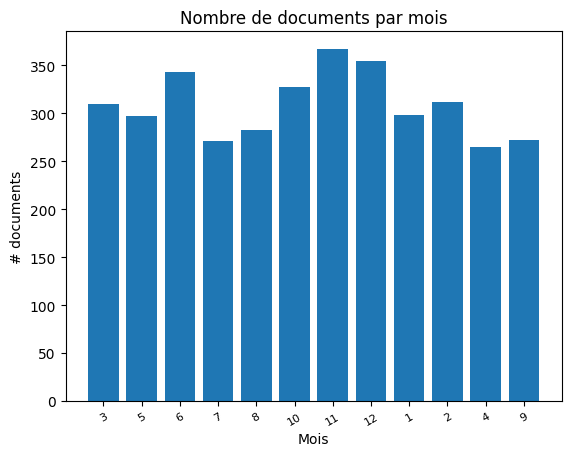

In [22]:
index = np.arange(len(count_month))
plt.bar(index, count_month.values())
plt.xlabel('Mois')
plt.ylabel('# documents')
plt.xticks(index, count_month.keys(), fontsize=8, rotation=30)
plt.title('Nombre de documents par mois')
plt.show()

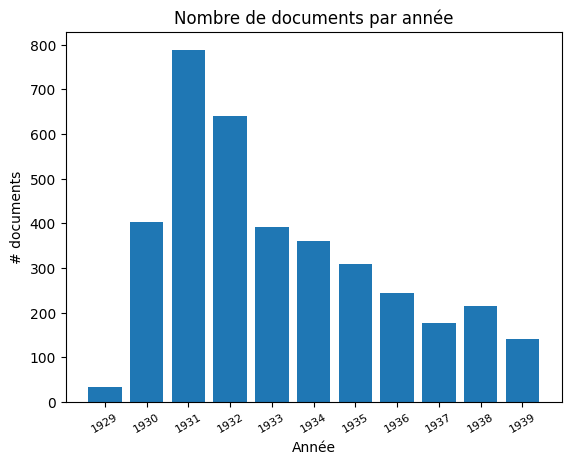

In [24]:
index = np.arange(len(count_year))
plt.bar(index, count_year.values())
plt.xlabel('Année')
plt.ylabel('# documents')
plt.xticks(index, count_year.keys(), fontsize=8, rotation=30)
plt.title('Nombre de documents par année')
plt.show()